In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import os
from shapely.geometry import mapping, box
from rasterio.mask import mask
from rasterio.enums import Resampling

In [4]:
df = pd.read_csv("combined_data.csv")

In [5]:
df.head(20)

,Year,District,LandCoverClass,PixelCount,Percentage,LandCoverLabel,Precipitation (mm),GPP (kg_C/m²/year),Population Density (People/km²)
0,2010,El Ghabra,7,19,0.727691,Open Shrublands,433.27615,1156.236088,25.989079
1,2010,El Ghabra,10,1736,66.487936,Grasslands,433.27615,1156.236088,25.989079
2,2010,El Ghabra,16,856,32.784374,Barren or Sparsely Vegetated,433.27615,1156.236088,25.989079
3,2010,Guerou,10,517,94.000000,Grasslands,382.97240,957.672330,139.183940
4,2010,Guerou,16,33,6.000000,Barren or Sparsely Vegetated,382.97240,957.672330,139.183940
5,2010,Barkeiwel,7,3,0.390117,Open Shrublands,425.15533,1031.153846,48.570004
6,2010,Barkeiwel,10,298,38.751625,Grasslands,425.15533,1031.153846,48.570004
7,2010,Barkeiwel,16,468,60.858257,Barren or Sparsely Vegetated,425.15533,1031.153846,48.570004
8,2010,Legrane,7,196,1.316939,Open Shrublands,441.89813,1398.148860,3.990735
9,2010,Legrane,10,14687,98.683061,Grasslands,441.89813,1398.148860,3.990735


In [13]:
total_area = df['PixelCount'].apply(lambda x: x * 0.25)

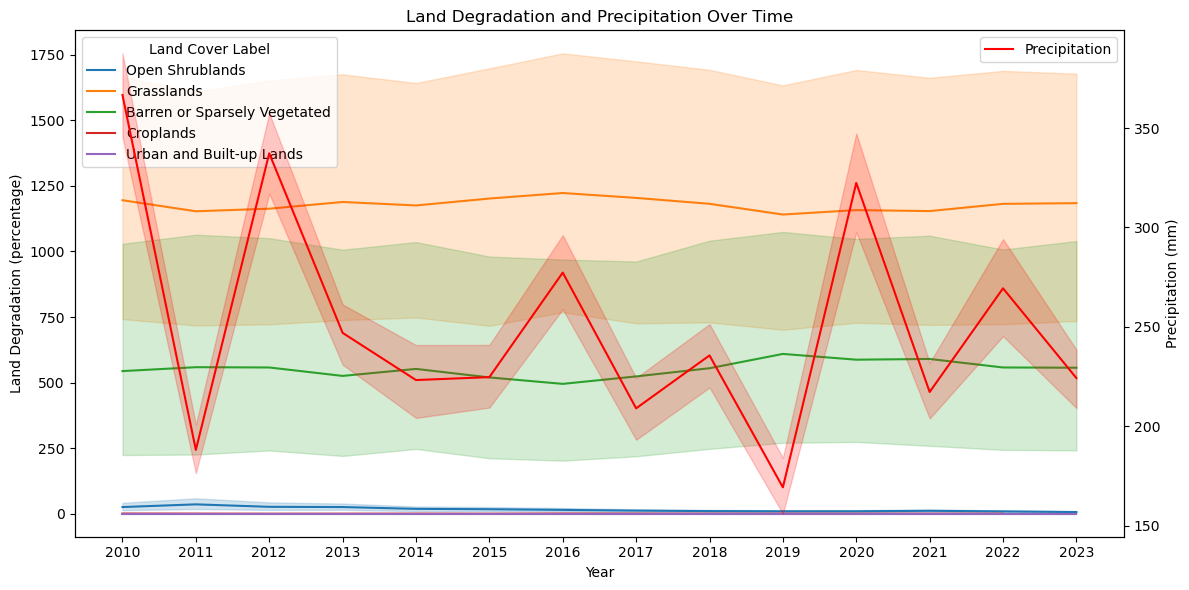

In [17]:
# land degradation over time with precipitation

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot land degradation
sns.lineplot(data=df, x='Year', y=total_area, hue='LandCoverLabel', ax=ax1)
ax1.set_title('Land Degradation and Precipitation Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Land Degradation (percentage)')
ax1.set_xticks(df['Year'].unique())
ax1.legend(title='Land Cover Label', loc='upper left')

# Create a secondary y-axis for precipitation
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Year', y='Precipitation (mm)', color='red', label='Precipitation', ax=ax2)
ax2.set_ylabel('Precipitation (mm)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()